<a href="https://colab.research.google.com/github/moshimoshisama/Expedia_Analysis/blob/main/6_log_reg_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook perform logistic regression classification models on sampled dataset, for click through and transaction predictions

# **Part I: Data Read in**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
top10 = pd.read_csv("/content/drive/MyDrive/expedia/source/top1_0_data.csv",sep=",")
top11 = pd.read_csv("/content/drive/MyDrive/expedia/source/top1_1_sample_data.csv",sep=",")
top21 = pd.read_csv("/content/drive/MyDrive/expedia/source/top2_1_sample.csv",sep=",")
top20 = pd.read_csv("/content/drive/MyDrive/expedia/source/top2_0_sample_data.csv",sep=",")
top3 = pd.read_csv("/content/drive/MyDrive/expedia/source/top3_sample.csv",sep=",")

In [5]:
top_list = [top10,top11,top21,top20,top3]

In [6]:
top_all = pd.concat(top_list)

In [7]:
amenities = pd.read_csv("drive/MyDrive/expedia/source/amenities.tsv",sep="\t")

In [8]:
top_all_merge = top_all.merge(amenities,on=['prop_id'], how='left')

# **Part II: look into some of the bar plots over the dataset**

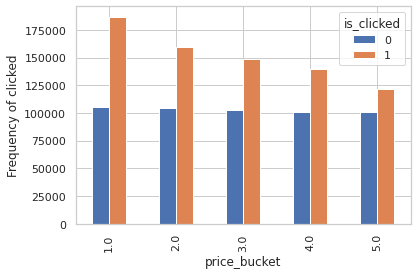

In [8]:
# frequency of clicked through over price bucket 
%matplotlib inline
pd.crosstab(top_all_merge.price_bucket,top_all_merge.is_clicked).plot(kind='bar')
plt.xlabel('price_bucket')
plt.ylabel('Frequency of clicked')
plt.savefig('fre_price_bucket_clicked')

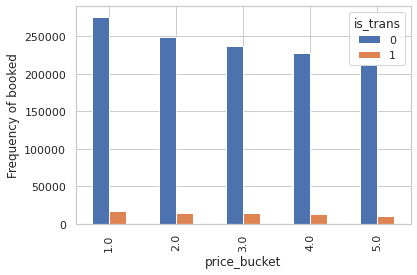

In [9]:
# frequency of transaction over price bucket 
%matplotlib inline
pd.crosstab(top_all_merge.price_bucket,top_all_merge.is_trans).plot(kind='bar')
plt.xlabel('price_bucket')
plt.ylabel('Frequency of booked')
plt.savefig('fre_price_bucket_booked')

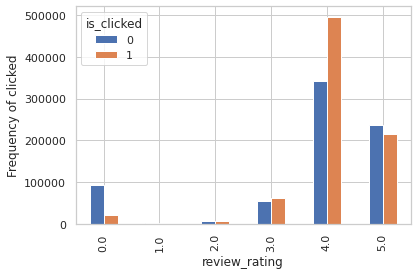

In [10]:
# frequency of clicked through over reiew rating 
%matplotlib inline
pd.crosstab(top_all_merge.review_rating,top_all_merge.is_clicked).plot(kind='bar')
plt.xlabel('review_rating')
plt.ylabel('Frequency of clicked')
plt.savefig('fre_review_rating_clicked')

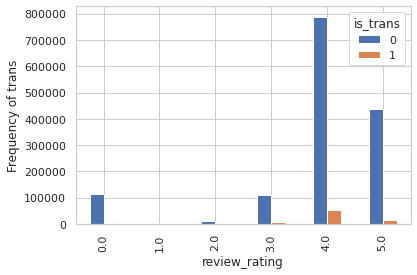

In [11]:
# frequency of transaction over reiew rating 
%matplotlib inline
pd.crosstab(top_all_merge.review_rating,top_all_merge.is_trans).plot(kind='bar')
plt.xlabel('review_rating')
plt.ylabel('Frequency of trans')
plt.savefig('fre_review_rating_trans')

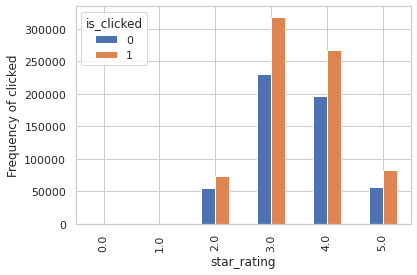

In [12]:
# frequency of clicked through over star rating 
%matplotlib inline
pd.crosstab(top_all_merge.star_rating,top_all_merge.is_clicked).plot(kind='bar')
plt.xlabel('star_rating')
plt.ylabel('Frequency of clicked')
plt.savefig('fre_star_rating_clicked')

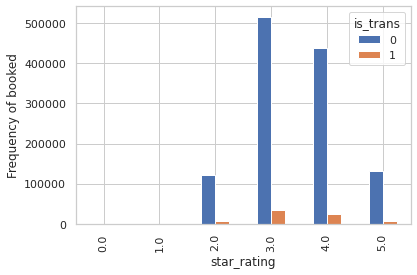

In [13]:
# frequency of transaction over star rating 
%matplotlib inline
pd.crosstab(top_all_merge.star_rating,top_all_merge.is_trans).plot(kind='bar')
plt.xlabel('star_rating')
plt.ylabel('Frequency of booked')
plt.savefig('fre_star_rating_booked')

# **Part III: Data Preprocessing & Feature Selecting & Model training**

**In General Data Preprocessing**

In [9]:
# only keep binary and catagorical features
top_all_merge = top_all_merge.drop(['user_id','search_id','search_timestamp','point_of_sale','is_mobile',\
                  'geo_location_country','destination_id','checkin_date',\
                  'checkout_date','adult_count','child_count','infant_count','room_count','impressions','year_month',\
                  'year','month','prop_id','review_count','num_clicks','applied_filters','sort_type','rank',\
                  ],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [16]:
top_all_merge['is_clicked'].value_counts()

1    802820
0    738343
Name: is_clicked, dtype: int64

In [17]:
top_all_merge['is_trans'].value_counts()

0    1466079
1      75084
Name: is_trans, dtype: int64

In [10]:
# expand the catagorical features into binary features
cat_vars=['review_rating','star_rating','price_bucket']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(top_all_merge[var], prefix=var)
    data1=top_all_merge.join(cat_list)
    top_all_merge=data1
cat_vars=['review_rating','star_rating','price_bucket']
data_vars=top_all_merge.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [19]:
# list of features after expand
to_keep

['is_travel_ad',
 'is_free_cancellation',
 'is_drr',
 'is_trans',
 'is_clicked',
 'AirConditioning',
 'AirportTransfer',
 'Bar',
 'FreeAirportTransportation',
 'FreeBreakfast',
 'FreeParking',
 'FreeWiFi',
 'Gym',
 'HighSpeedInternet',
 'HotTub',
 'LaundryFacility',
 'Parking',
 'PetsAllowed',
 'PrivatePool',
 'SpaServices',
 'SwimmingPool',
 'WasherDryer',
 'WiFi',
 'review_rating_0.0',
 'review_rating_1.0',
 'review_rating_2.0',
 'review_rating_3.0',
 'review_rating_4.0',
 'review_rating_5.0',
 'star_rating_0.0',
 'star_rating_1.0',
 'star_rating_2.0',
 'star_rating_3.0',
 'star_rating_4.0',
 'star_rating_5.0',
 'price_bucket_1.0',
 'price_bucket_2.0',
 'price_bucket_3.0',
 'price_bucket_4.0',
 'price_bucket_5.0']

In [14]:
data_final=top_all_merge[to_keep]
data_final_trans = data_final.drop(['is_clicked'],1)
data_final_click = data_final.drop(['is_trans'],1)
data_final.columns.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


array(['is_travel_ad', 'is_free_cancellation', 'is_drr', 'is_trans',
       'is_clicked', 'AirConditioning', 'AirportTransfer', 'Bar',
       'FreeAirportTransportation', 'FreeBreakfast', 'FreeParking',
       'FreeWiFi', 'Gym', 'HighSpeedInternet', 'HotTub',
       'LaundryFacility', 'Parking', 'PetsAllowed', 'PrivatePool',
       'SpaServices', 'SwimmingPool', 'WasherDryer', 'WiFi',
       'review_rating_0.0', 'review_rating_1.0', 'review_rating_2.0',
       'review_rating_3.0', 'review_rating_4.0', 'review_rating_5.0',
       'star_rating_0.0', 'star_rating_1.0', 'star_rating_2.0',
       'star_rating_3.0', 'star_rating_4.0', 'star_rating_5.0',
       'price_bucket_1.0', 'price_bucket_2.0', 'price_bucket_3.0',
       'price_bucket_4.0', 'price_bucket_5.0'], dtype=object)

In [16]:
data_final_trans = data_final_trans.fillna(0)
data_final_click = data_final_click.fillna(0)

**Data oversampling and Feature selecting for click through prediction**

In [17]:
# oversampled click through dataset
X = data_final_click.loc[:, data_final_click.columns != 'is_clicked']
y = data_final_click.loc[:, data_final_click.columns == 'is_clicked']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
#os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=X_train,columns=columns )
os_data_y= pd.DataFrame(data=y_train,columns=['is_clicked'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['is_clicked']==0]))
print("Number of subscription",len(os_data_y[os_data_y['is_clicked']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['is_clicked']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['is_clicked']==1])/len(os_data_X))

length of oversampled data is  1078814
Number of no subscription in oversampled data 517369
Number of subscription 561445
Proportion of no subscription data in oversampled data is  0.47957201148668815
Proportion of subscription data in oversampled data is  0.5204279885133118


In [18]:
# perform RFE to select features
data_final_vars=data_final.columns.values.tolist()
y=['is_clicked']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, step= 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[ True False  True False  True  True False False False False False False
 False False False False False  True False False False  True  True  True
  True False False False  True  True  True  True  True  True  True  True
  True  True]
[1 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1
 1]


In [19]:
cols = ['is_travel_ad', 'is_free_cancellation', 'is_drr',
      'AirConditioning', 'AirportTransfer', 'Bar',
       'FreeAirportTransportation', 'FreeBreakfast', 'FreeParking',
       'FreeWiFi', 'Gym', 'HighSpeedInternet', 'HotTub',
       'LaundryFacility', 'Parking', 'PetsAllowed', 'PrivatePool',
       'SpaServices', 'SwimmingPool', 'WasherDryer', 'WiFi',
       'review_rating_0.0', 'review_rating_1.0', 'review_rating_2.0',
       'review_rating_3.0', 'review_rating_4.0', 'review_rating_5.0',
       'star_rating_1.0', 'star_rating_2.0', 'star_rating_3.0',
       'star_rating_4.0', 'star_rating_5.0', 'price_bucket_1.0',
       'price_bucket_2.0', 'price_bucket_3.0', 'price_bucket_4.0',
       'price_bucket_5.0']

In [20]:
# select the features based on RFE results
selected=[]
for i in range(0,len(cols)):
  if (rfe.support_[i]==True):
    selected.append(cols[i])

print(selected)

['is_travel_ad', 'is_drr', 'AirportTransfer', 'Bar', 'SpaServices', 'review_rating_0.0', 'review_rating_1.0', 'review_rating_2.0', 'review_rating_3.0', 'star_rating_2.0', 'star_rating_3.0', 'star_rating_4.0', 'star_rating_5.0', 'price_bucket_1.0', 'price_bucket_2.0', 'price_bucket_3.0', 'price_bucket_4.0', 'price_bucket_5.0']


In [21]:
# identify x and y for training
X=os_data_X[selected]
y=os_data_y['is_clicked']

In [22]:
# perform statistical logistic model, if any feature with p-value > 0.05, we drop the feature
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.647972
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.064       
Dependent Variable: is_clicked       AIC:              1398117.7817
Date:               2022-05-06 10:01 BIC:              1398331.8264
No. Observations:   1078814          Log-Likelihood:   -6.9904e+05 
Df Model:           17               LL-Null:          -7.4688e+05 
Df Residuals:       1078796          LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     5.0000                                         
-------------------------------------------------------------------
                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
is_travel_ad       0.5916   0.0087   67.7592 0.0000  0.5745  0.6087
is_drr            -0.2063   0.0046  -44.5

Logistic Regression Model Training for click through prediction

In [23]:
# split the dataset into 70% training and 30% testing, then fit the logistic regresion model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [24]:
# predict on y and calculate accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


In [25]:
# confusion matrix, the result is telling us that we have 67253+145454 correct predictions and 88031+22907 incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 67253  88031]
 [ 22907 145454]]


In [26]:
# calculate metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55    155284
           1       0.62      0.86      0.72    168361

    accuracy                           0.66    323645
   macro avg       0.68      0.65      0.64    323645
weighted avg       0.68      0.66      0.64    323645



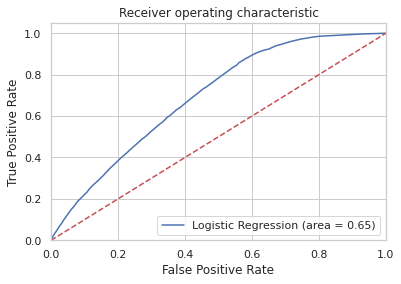

In [27]:
# plot ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Data oversampling and Feature selecting for transaction prediction**

In [28]:
# oversampled transaction dataset
X = data_final_trans.loc[:, data_final_trans.columns != 'is_trans']
y = data_final_trans.loc[:, data_final_trans.columns == 'is_trans']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['is_trans'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['is_trans']==0]))
print("Number of subscription",len(os_data_y[os_data_y['is_trans']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['is_trans']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['is_trans']==1])/len(os_data_X))

length of oversampled data is  2052412
Number of no subscription in oversampled data 1026206
Number of subscription 1026206
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [29]:
# perform RFE to select features
data_final_vars=data_final_trans.columns.values.tolist()
y=['is_trans']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, step= 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[ True False False False  True False False False False False  True False
 False False False False  True False False  True False  True  True  True
  True  True  True False  True  True  True  True  True False False  True
  True  True]
[1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1
 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [30]:
trans_cols = ['is_travel_ad',
 'is_free_cancellation',
 'is_drr',
 'AirConditioning',
 'AirportTransfer',
 'Bar',
 'FreeAirportTransportation',
 'FreeBreakfast',
 'FreeParking',
 'FreeWiFi',
 'Gym',
 'HighSpeedInternet',
 'HotTub',
 'LaundryFacility',
 'Parking',
 'PetsAllowed',
 'PrivatePool',
 'SpaServices',
 'SwimmingPool',
 'WasherDryer',
 'WiFi',
 'review_rating_0.0',
 'review_rating_1.0',
 'review_rating_2.0',
 'review_rating_3.0',
 'review_rating_4.0',
 'review_rating_5.0',
 'star_rating_1.0',
 'star_rating_2.0',
 'star_rating_3.0',
 'star_rating_4.0',
 'star_rating_5.0',
 'price_bucket_1.0',
 'price_bucket_2.0',
 'price_bucket_3.0',
 'price_bucket_4.0',
 'price_bucket_5.0']

In [31]:
# select the features based on RFE results
selected=[]
for i in range(0,len(cols)):
  if (rfe.support_[i]==True):
    selected.append(trans_cols[i])

print(selected)

['is_travel_ad', 'AirportTransfer', 'Gym', 'PrivatePool', 'WasherDryer', 'review_rating_0.0', 'review_rating_1.0', 'review_rating_2.0', 'review_rating_3.0', 'review_rating_4.0', 'review_rating_5.0', 'star_rating_2.0', 'star_rating_3.0', 'star_rating_4.0', 'star_rating_5.0', 'price_bucket_1.0', 'price_bucket_4.0', 'price_bucket_5.0']


In [32]:
# identify x and y for training
X=os_data_X[selected]
y=os_data_y['is_trans']

In [33]:
# perform statistical logistic model, if any feature with p-value > 0.05, we drop the feature
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.619119
         Iterations 9
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.107       
Dependent Variable: is_trans         AIC:              2541408.5740
Date:               2022-05-06 10:05 BIC:              2541634.1955
No. Observations:   2052412          Log-Likelihood:   -1.2707e+06 
Df Model:           17               LL-Null:          -1.4226e+06 
Df Residuals:       2052394          LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     9.0000                                         
-------------------------------------------------------------------
                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
is_travel_ad      -0.7166   0.0064 -112.3238 0.0000 -0.7291 -0.7041
AirportTransfer   -0.6797   0.0068 -100.6

In [34]:
# split the dataset into 70% training and 30% testing, then fit the logistic regresion model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [35]:
# predict on y and calculate accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


In [36]:
# confusion matrix, the result is telling us that we have 147447+243253 correct predictions and 160524+64500 incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[147447 160524]
 [ 64500 243253]]


In [37]:
# calculate metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57    307971
           1       0.60      0.79      0.68    307753

    accuracy                           0.63    615724
   macro avg       0.65      0.63      0.63    615724
weighted avg       0.65      0.63      0.63    615724



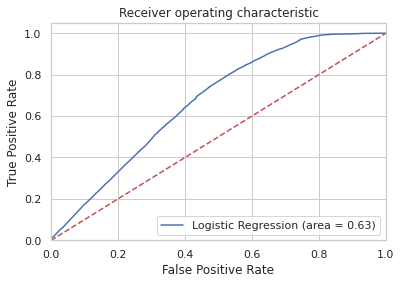

In [38]:
# plot ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()